In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
df = pd.read_csv('startups_data_cleaned_step1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12306 entries, 0 to 12305
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  12306 non-null  object 
 1   market                12306 non-null  object 
 2   funding_total_usd     12306 non-null  float64
 3   country_code          12306 non-null  object 
 4   state_code            12301 non-null  object 
 5   region                12306 non-null  object 
 6   city                  12291 non-null  object 
 7   funding_rounds        12306 non-null  int64  
 8   founded_at            12306 non-null  object 
 9   founded_month         12306 non-null  int64  
 10  founded_quarter       12306 non-null  int64  
 11  founded_year          12306 non-null  int64  
 12  first_funding_at      12306 non-null  object 
 13  last_funding_at       12306 non-null  object 
 14  seed                  12306 non-null  int64  
 15  venture            

In [5]:
#Data Preprocessing

In [7]:
# Create copy of dataframe
df_processed = df.copy()

# Convert date columns to datetime
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    df_processed[col] = pd.to_datetime(df_processed[col])

In [9]:
# Create temporal features
df_processed['days_to_first_funding'] = (df_processed['first_funding_at'] - df_processed['founded_at']).dt.days
df_processed['funding_duration'] = (df_processed['last_funding_at'] - df_processed['first_funding_at']).dt.days
df_processed['company_age'] = (pd.Timestamp('2024-01-01') - df_processed['founded_at']).dt.days

In [11]:
# Fill NaN values
df_processed['days_to_first_funding'] = df_processed['days_to_first_funding'].fillna(-1)
df_processed['funding_duration'] = df_processed['funding_duration'].fillna(0)
df_processed['company_age'] = df_processed['company_age'].fillna(-1)

In [13]:
# Now check for negative values in 'days_to_first_funding'
negative_days_to_funding = df_processed[df_processed['days_to_first_funding'] < 0]

In [15]:
negative_days_to_funding.loc[:,['founded_at','first_funding_at','days_to_first_funding']]

,founded_at,first_funding_at,days_to_first_funding
6,2014-10-10,2014-10-07,-3
7,2014-10-01,2014-09-14,-17
12,2014-09-18,2014-09-14,-4
23,2014-09-01,2013-08-06,-391
24,2014-09-01,2013-01-16,-593
...,...,...,...
12253,1999-01-01,1996-12-31,-731
12275,1998-11-28,1998-01-01,-331
12280,1998-01-01,1997-09-30,-93
12299,1996-01-01,1995-01-01,-365


In [17]:
# Drop rows where 'days_to_first_funding' is negative
df_processed = df_processed[df_processed['days_to_first_funding'] >= 0]

In [19]:
df_processed.columns

Index(['name', 'market', 'funding_total_usd', 'country_code', 'state_code',
       'region', 'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'category_count', 'clean_name', 'is_operating', 'category_updated',
       'days_to_first_funding', 'funding_duration', 'company_age'],
      dtype='object')

In [21]:
df_processed

,name,market,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,...,round_F,round_G,round_H,category_count,clean_name,is_operating,category_updated,days_to_first_funding,funding_duration,company_age
0,Le HerbÈ,Medical Marijuana Patients,100000.0,USA,WA,Seattle,Seattle,1,2014-12-01,12,...,0,0,0,3,le herbè,1,Healthcare,0,0,3318
1,Kandid,Apps,1400000.0,USA,CA,SF Bay Area,San Francisco,1,2014-11-19,11,...,0,0,0,1,kandid,1,Technology,13,0,3330
2,The Manly Man Can,Fashion,30.0,USA,MI,Detroit,Pinckney,1,2014-10-26,10,...,0,0,0,1,the manly man can,1,Fashion & Lifestyle,1,0,3354
3,MyKidsCalendar,Software,110000.0,USA,NJ,Newark,Long Valley,1,2014-10-22,10,...,0,0,0,1,mykidscalendar,1,Technology,0,0,3358
4,Peach,Fashion,500000.0,USA,CA,SF Bay Area,Berkeley,1,2014-10-19,10,...,0,0,0,3,peach,1,Fashion & Lifestyle,4,0,3361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,XO Group,Media,19600000.0,USA,NY,New York City,New York,3,1996-01-01,1,...,0,0,0,3,xo group,1,other,0,1200,10227
12301,eBay,Business Services,6700000.0,USA,CA,SF Bay Area,San Jose,1,1995-09-01,9,...,0,0,0,6,ebay,1,Business Services,639,0,10349
12302,Arkansas Children's Hospital,Biotechnology,3500000.0,USA,AR,Little Rock,Little Rock,1,2012-01-01,1,...,0,0,0,1,arkansas children's hospital,1,Healthcare,628,0,4383
12303,Northcentral Technical College,Education,6200000.0,USA,WI,WI - Other,Antigo,1,2012-01-01,1,...,0,0,0,1,northcentral technical college,1,Education,627,0,4383


In [23]:
# Selected features (reduced set)
selected_features = [
    'funding_total_usd',
    'funding_rounds',
    'days_to_first_funding',
    'funding_duration',
    'category_count',
    'company_age'
]

In [25]:
# Encode categorical variables (reduced set)
categorical_features = ['category_updated', 'state_code']

In [27]:
# One-Hot Encoding with pandas
df_processed = pd.get_dummies(df_processed, columns=categorical_features, drop_first=False)

# Identify dummy columns
dummy_columns = [col for col in df_processed.columns if any(prefix in col for prefix in categorical_features)]

# Update feature_columns
feature_columns = selected_features + dummy_columns

In [29]:
# Create feature matrix
X = df_processed[feature_columns]
y = df_processed['is_operating']

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11386 entries, 0 to 12304
Data columns (total 68 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   funding_total_usd                        11386 non-null  float64
 1   funding_rounds                           11386 non-null  int64  
 2   days_to_first_funding                    11386 non-null  int64  
 3   funding_duration                         11386 non-null  int64  
 4   category_count                           11386 non-null  int64  
 5   company_age                              11386 non-null  int64  
 6   category_updated_Business Services       11386 non-null  bool   
 7   category_updated_Education               11386 non-null  bool   
 8   category_updated_Energy & Environment    11386 non-null  bool   
 9   category_updated_Fashion & Lifestyle     11386 non-null  bool   
 10  category_updated_Finance                 11386 non-

In [33]:
#Create a DataFrame to store all the evaluation metrics
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Features Selected', 'Validation Technique', 'Accuracy', 'TPR', 'FPR', 'Precision', 'F1 Score',
                                   'ROC-AUC'])

## Build Model - Gradient Boosting (without CV)

In [35]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
#Build the model 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,f1_score

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Predictions
y_pred = gbm.predict(X_test)
y_pred_proba = gbm.predict_proba(X_test)[:, 1]

#Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# True Positive Rate (TPR) or Sensitivity
tpr = tp / (tp + fn)

# False Positive Rate (FPR)
fpr_value = fp / (fp + tn)

# Precision
precision = precision_score(y_test, y_pred)


#F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Print the metrics
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr_value:.2f}")
print(f"Precision: {precision:.2f}")

F1 Score: 0.91
Confusion Matrix:
[[  92  272]
 [  76 1838]]
Accuracy: 0.85
True Positive Rate (TPR): 0.96
False Positive Rate (FPR): 0.75
Precision: 0.87


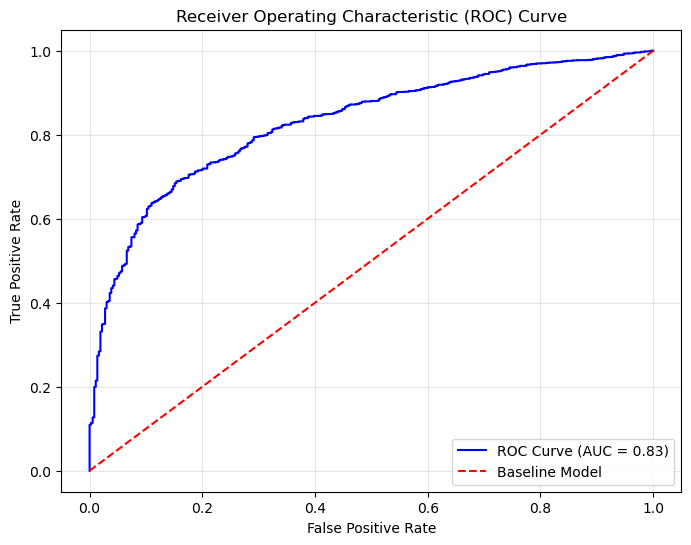

In [41]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', label='Baseline Model', linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [47]:
# For Model 1 (without cross-validation), before feature selection
model_1_results = {
    'Model': 'Gradient Boosting',  
    'Features Selected': 'All Features',  
    'Validation Technique': 'No CV',  
    'Accuracy': accuracy,
    'TPR': tpr,
    'FPR': fpr_value,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': roc_auc
}

# Create a DataFrame for the new row
new_row = pd.DataFrame([model_1_results])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row], ignore_index=True)

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_23222/2531870861.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


## Feature Importance for Gradient Boosting

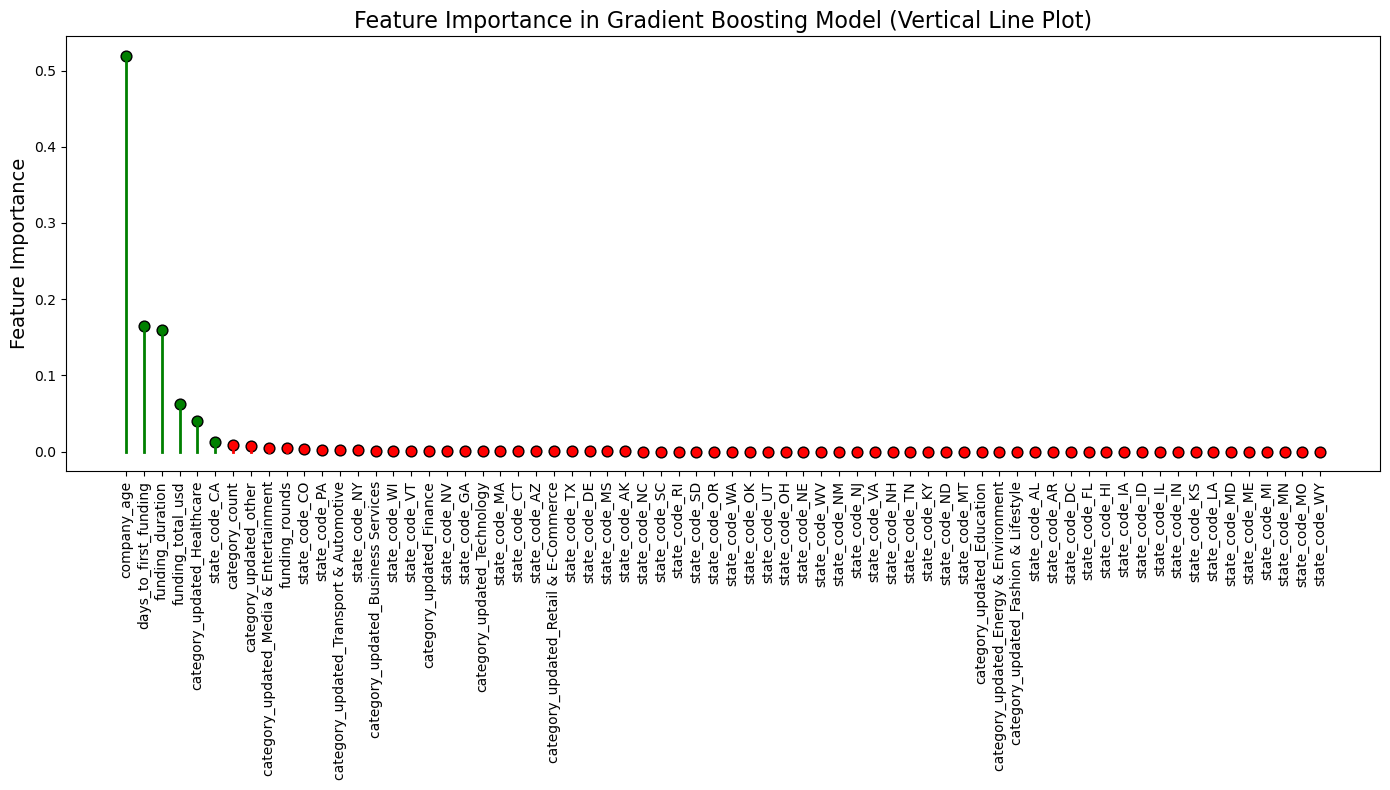

In [52]:
#Feature importance

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract feature importance from the model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbm.feature_importances_
})

# Sort features by importance
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

# Vertical Line Plot
plt.figure(figsize=(14, 8))

# Colors to differentiate important features
colors = ['green' if imp > 0.01 else 'red' for imp in feature_importance_sorted['Importance']]

# Plot vertical lines
for idx, (feature, imp, color) in enumerate(zip(feature_importance_sorted['Feature'],
                                                feature_importance_sorted['Importance'],
                                                colors)):
    plt.plot([idx, idx], [0, imp], color=color, linewidth=2)
    plt.scatter(idx, imp, color=color, s=60, edgecolor='black')  # Marker at the tip of the line

# Add feature names as x-axis labels
plt.xticks(range(len(feature_importance_sorted)), feature_importance_sorted['Feature'], rotation=90, fontsize=10)

# Adding labels and title
plt.ylabel("Feature Importance", fontsize=14)
plt.title("Feature Importance in Gradient Boosting Model (Vertical Line Plot)", fontsize=16)

# Optimize layout
plt.tight_layout()
plt.show()

In [56]:
#Select top 10 features
top_n = 10 
selected_features_top_10 = feature_importance_sorted.head(top_n)['Feature'].tolist()
print("Selected Top 10 Features:", selected_features_top_10)

Selected Top 10 Features: ['company_age', 'days_to_first_funding', 'funding_duration', 'funding_total_usd', 'category_updated_Healthcare', 'state_code_CA', 'category_count', 'category_updated_other', 'category_updated_Media & Entertainment', 'funding_rounds']


In [60]:
# Set a threshold for feature importance
threshold = 0.05

# Filter features based on importance
important_features = feature_importance_sorted[feature_importance_sorted['Importance'] >=threshold]['Feature'].tolist()
print("Selected Features based on threshold:", important_features)

Selected Features based on threshold: ['company_age', 'days_to_first_funding', 'funding_duration', 'funding_total_usd']


## Gradient Boosting with Top 10 features 

In [68]:
#Build the model using those features

X_important = X[selected_features_top_10]

# Scale features
scaler = StandardScaler()
X_scaled_imp = scaler.fit_transform(X_important)

#Split data into training and testing
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_scaled_imp, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the model
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_imp, y_train)

# Predictions
y_pred = gbm.predict(X_test_imp)
y_pred_proba = gbm.predict_proba(X_test_imp)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# True Positive Rate (TPR) or Sensitivity
tpr = tp / (tp + fn)

# False Positive Rate (FPR)
fpr_value = fp / (fp + tn)

# Precision
precision = precision_score(y_test, y_pred)

#F1 score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr_value:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[  90  274]
 [  77 1837]]
Accuracy: 0.85
True Positive Rate (TPR): 0.96
False Positive Rate (FPR): 0.75
Precision: 0.87
F1 Score: 0.91


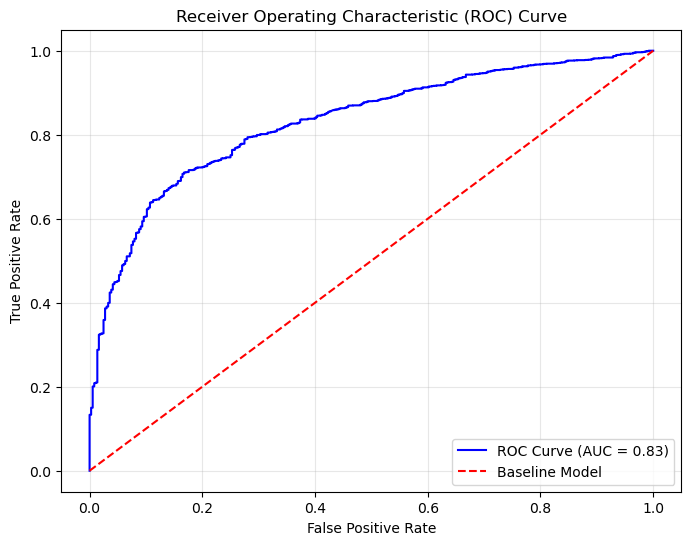

In [64]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', label='Baseline Model', linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [70]:
# For Model 1 (without cross-validation), after feature selection (top 10 )
model_1_results_1 = {
    'Model': 'Gradient Boosting',  
    'Features Selected': 'Top 10 Features',  
    'Validation Technique': 'No CV',  
    'Accuracy': accuracy,
    'TPR': tpr,
    'FPR': fpr_value,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': roc_auc
}

# Create a DataFrame for the new row
new_row_1 = pd.DataFrame([model_1_results_1])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_1], ignore_index=True)

## Gradient Boosting with Features by threshold

In [85]:
#Build the model using those features

X_important = X[important_features]

# Scale features
scaler = StandardScaler()
X_scaled_imp = scaler.fit_transform(X_important)

#Split data into training and testing
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_scaled_imp, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the model
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_imp, y_train)

# Predictions
y_pred = gbm.predict(X_test_imp)
y_pred_proba = gbm.predict_proba(X_test_imp)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# True Positive Rate (TPR) or Sensitivity
tpr = tp / (tp + fn)

# False Positive Rate (FPR)
fpr_value = fp / (fp + tn)

# Precision
precision = precision_score(y_test, y_pred)

#F1 score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr_value:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[  81  283]
 [  76 1838]]
Accuracy: 0.84
True Positive Rate (TPR): 0.96
False Positive Rate (FPR): 0.78
Precision: 0.87
F1 Score: 0.91


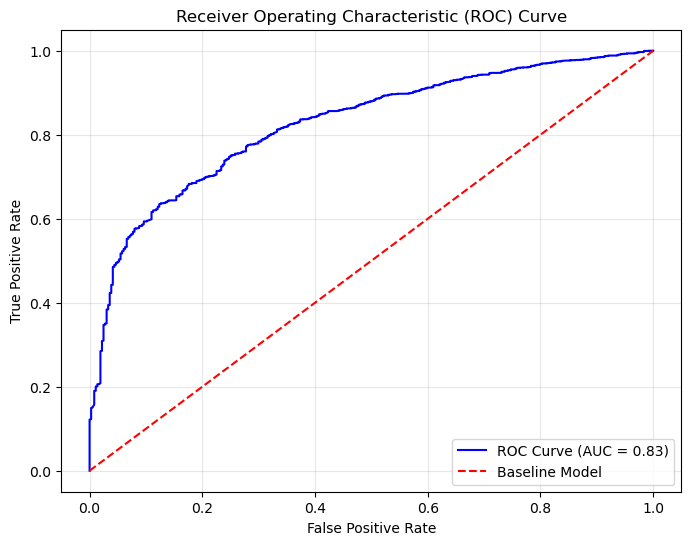

In [79]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', label='Baseline Model', linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [99]:
# For Model 1 (without cross-validation), after feature selection (based on threshold )
model_1_results_2 = {
    'Model': 'Gradient Boosting',  
    'Features Selected': 'Thresholded Features',  
    'Validation Technique': 'No CV',  
    'Accuracy': accuracy,
    'TPR': tpr,
    'FPR': fpr_value,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': roc_auc
}

# Create a DataFrame for the new row
new_row_2 = pd.DataFrame([model_1_results_2])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_2], ignore_index=True)

## XGBoosting without CV - No feature Selection

In [110]:
#Using the XGBooster to implement weights on the dataset for more balancing 

In [116]:
# Calculate the count of each class (0 and 1)
class_counts = df_processed['is_operating'].value_counts()

# Calculate the ratio of negative (0) to positive (1) classes
ratio_of_negative_to_positive_class = class_counts[0] / class_counts[1]

print("Ratio of negative to positive class: ", ratio_of_negative_to_positive_class)

Ratio of negative to positive class:  0.19038159958180867


In [128]:
#Build the model 

from xgboost import XGBClassifier

# XGBoost with scale_pos_weight
xgb = XGBClassifier(scale_pos_weight=ratio_of_negative_to_positive_class, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

#Evaluation Metrics

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)

# True Positive Rate (TPR) or Sensitivity
tpr = tp / (tp + fn)

# False Positive Rate (FPR)
fpr_value = fp / (fp + tn)

# Precision
precision = precision_score(y_test, y_pred_xgb)

#F1 score
f1 = f1_score(y_test, y_pred_xgb)


# Print the metrics
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr_value:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[ 251  113]
 [ 389 1525]]
Accuracy: 0.78
True Positive Rate (TPR): 0.80
False Positive Rate (FPR): 0.31
Precision: 0.93
F1 Score: 0.86


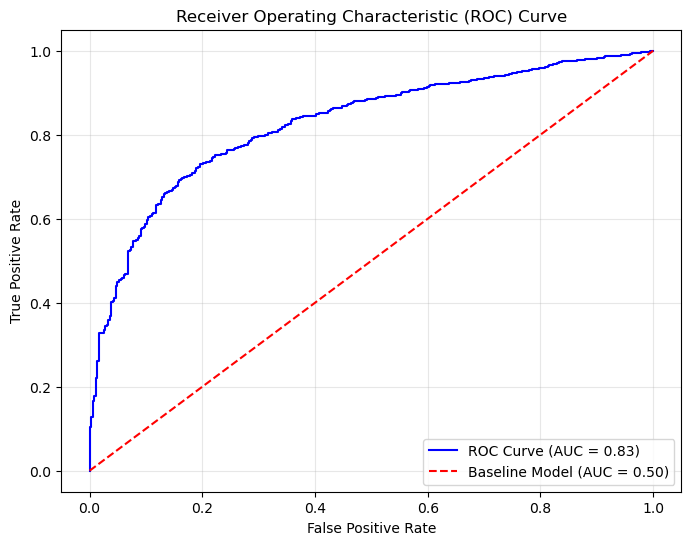

In [126]:
# ROC Curve
y_prob_test = xgb.predict_proba(X_test)[:, 1]  # For probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', label='Baseline Model (AUC = 0.50)', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [130]:
# For Model 2 (without cross-validation), no feature selection 
model_2_results = {
    'Model': 'XG Boosting',  
    'Features Selected': 'All Features',  
    'Validation Technique': 'No CV',  
    'Accuracy': accuracy,
    'TPR': tpr,
    'FPR': fpr_value,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': roc_auc
}

# Create a DataFrame for the new row
new_row_3 = pd.DataFrame([model_2_results])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_3], ignore_index=True)

## Feature importance of XGBoosting

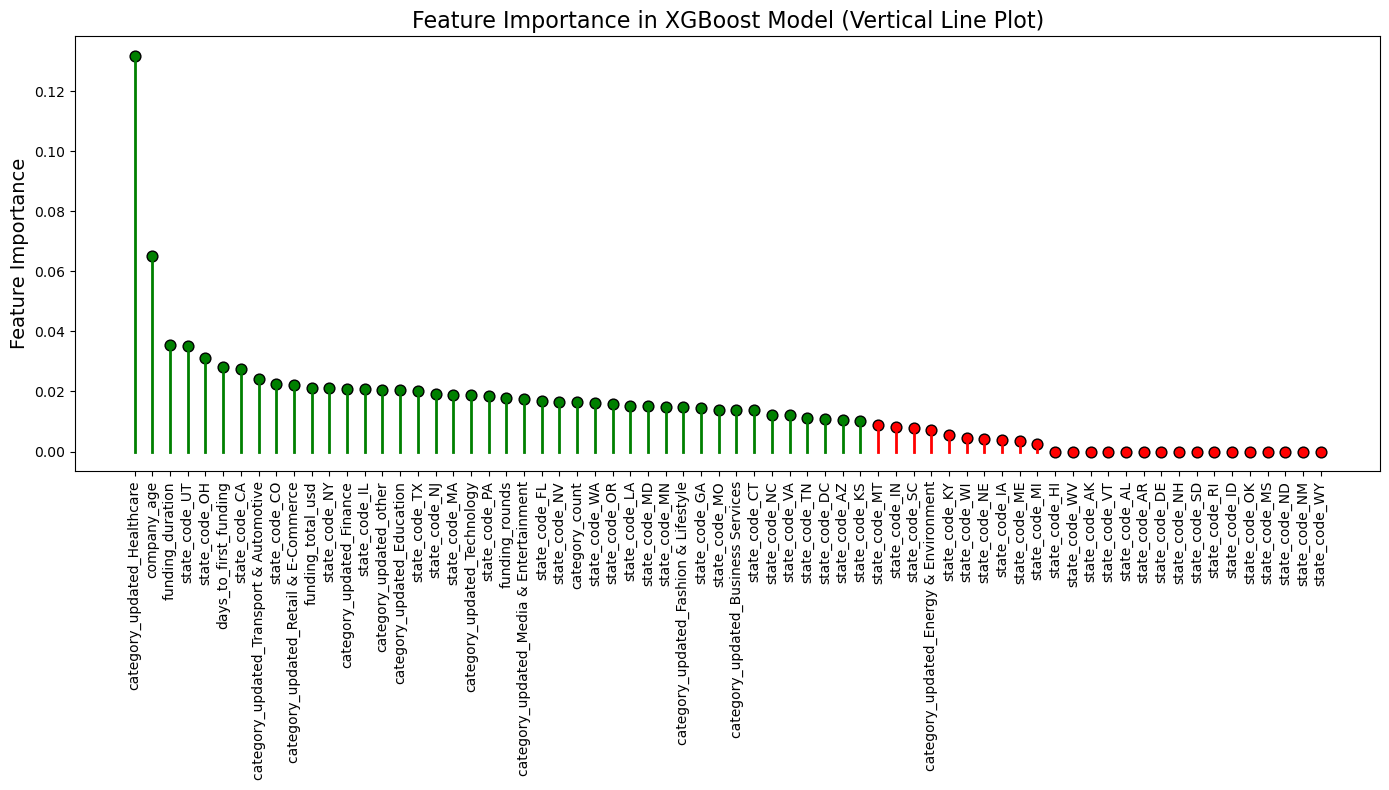

In [136]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Extract feature importance from the trained model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
})

# Sort features by importance
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

# Vertical Line Plot
plt.figure(figsize=(14, 8))

# Colors to differentiate important features
colors = ['green' if imp > 0.01 else 'red' for imp in feature_importance_sorted['Importance']]

# Plot vertical lines
for idx, (feature, imp, color) in enumerate(zip(feature_importance_sorted['Feature'],
                                                feature_importance_sorted['Importance'],
                                                colors)):
    plt.plot([idx, idx], [0, imp], color=color, linewidth=2)
    plt.scatter(idx, imp, color=color, s=60, edgecolor='black')  # Marker at the tip of the line

# Add feature names as x-axis labels
plt.xticks(range(len(feature_importance_sorted)), feature_importance_sorted['Feature'], rotation=90, fontsize=10)

# Adding labels and title
plt.ylabel("Feature Importance", fontsize=14)
plt.title("Feature Importance in XGBoost Model (Vertical Line Plot)", fontsize=16)

# Optimize layout
plt.tight_layout()
plt.show()

## XGBoosting Model with Top 10 features - No CV

In [139]:
#Select top 10 features
top_n = 10 
selected_features_top_10 = feature_importance_sorted.head(top_n)['Feature'].tolist()
print("Selected Top 10 Features:", selected_features_top_10)

Selected Top 10 Features: ['category_updated_Healthcare', 'company_age', 'funding_duration', 'state_code_UT', 'state_code_OH', 'days_to_first_funding', 'state_code_CA', 'category_updated_Transport & Automotive', 'state_code_CO', 'category_updated_Retail & E-Commerce']


In [142]:
X_important = X[selected_features_top_10]

In [144]:
# Calculate the count of each class (0 and 1)
class_counts = df_processed['is_operating'].value_counts()

# Calculate the ratio of negative (0) to positive (1) classes
ratio_of_negative_to_positive_class = class_counts[0] / class_counts[1]

print("Ratio of negative to positive class: ", ratio_of_negative_to_positive_class)

Ratio of negative to positive class:  0.19038159958180867


In [146]:
# Scale features
scaler = StandardScaler()
X_scaled_imp = scaler.fit_transform(X_important)

#Split data into training and testing
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_scaled_imp, y, test_size=0.2, random_state=42, stratify=y)

In [152]:
#Build the model 

from xgboost import XGBClassifier

# XGBoost with scale_pos_weight
xgb = XGBClassifier(scale_pos_weight=ratio_of_negative_to_positive_class, random_state=42)
xgb.fit(X_train_imp, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_imp)

#Evaluation Metrics

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)

# True Positive Rate (TPR) or Sensitivity
tpr = tp / (tp + fn)

# False Positive Rate (FPR)
fpr_value = fp / (fp + tn)

# Precision
precision = precision_score(y_test, y_pred_xgb)

#F1 score
f1 = f1_score(y_test, y_pred_xgb)


# Print the metrics
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr_value:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[ 268   96]
 [ 506 1408]]
Accuracy: 0.74
True Positive Rate (TPR): 0.74
False Positive Rate (FPR): 0.26
Precision: 0.94
F1 Score: 0.82


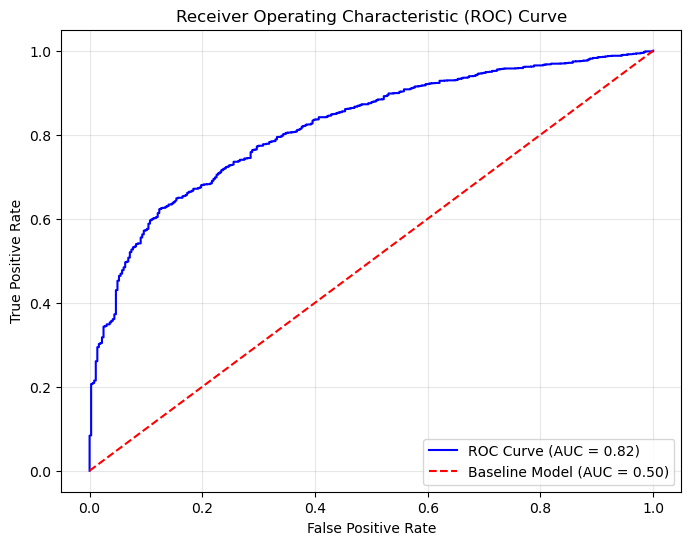

In [150]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_prob_test = xgb.predict_proba(X_test_imp)[:, 1]  # For probabilities

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', label='Baseline Model (AUC = 0.50)', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [154]:
# For Model 2 (without cross-validation), Top 10 feature selection 
model_2_results_1 = {
    'Model': 'XG Boosting',  
    'Features Selected': 'Top 10 Features',  
    'Validation Technique': 'No CV',  
    'Accuracy': accuracy,
    'TPR': tpr,
    'FPR': fpr_value,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': roc_auc
}

# Create a DataFrame for the new row
new_row_4 = pd.DataFrame([model_2_results_1])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_4], ignore_index=True)

## GridSearch for Top 10 features - XGBoosting

In [162]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [ratio_of_negative_to_positive_class],
}

# Create the XGBoost model
xgb = XGBClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,
)

grid_search.fit(X_train_imp, y_train)

# Display the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 0.19038159958180867, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.7708


In [164]:
# Train the final model with the best parameters
final_xgb_Grid= XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    scale_pos_weight=0.19038159958180867,
    subsample=0.8,
    random_state=42
)

final_xgb_Grid.fit(X_train_imp, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Confusion Matrix (Test Data):
[[ 229  135]
 [ 426 1488]]
Accuracy: 0.7537
True Positive Rate (TPR): 0.7774
False Positive Rate (FPR): 0.3709
Precision: 0.9168
F1 Score: 0.84
ROC-AUC: 0.8037


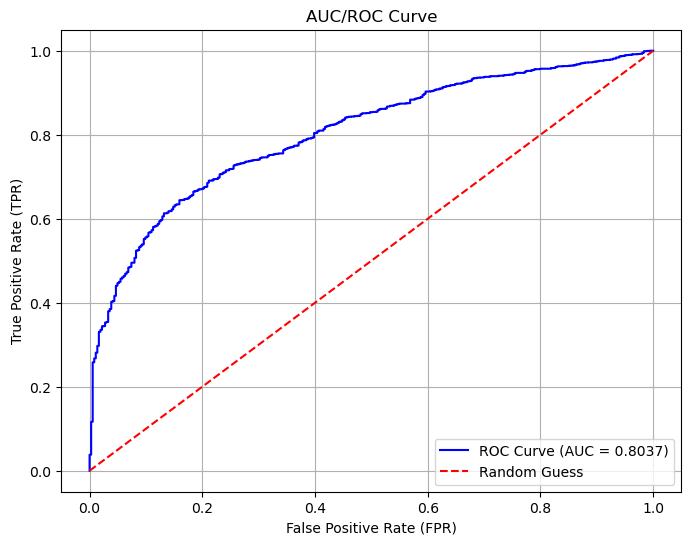

In [166]:
# Predict on test data
y_pred_test = final_xgb_Grid.predict(X_test_imp)
y_prob_test = final_xgb_Grid.predict_proba(X_test_imp)[:, 1]

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
TP, FP, FN, TN = conf_matrix[1, 1], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[0, 0]

# Metrics
accuracy = accuracy_score(y_test, y_pred_test)
TPR = TP / (TP + FN)  # True Positive Rate (Recall/Sensitivity)
FPR = FP / (FP + TN)  # False Positive Rate
precision = TP / (TP + FP)
f1 = f1_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_prob_test)

# Print metrics
print("Confusion Matrix (Test Data):")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {auc:.4f}")

# Plot AUC/ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC/ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [168]:
# For Model 2 (with GridSearch cross-validation), Top 10 feature selection 
model_2_results_2 = {
    'Model': 'XG Boosting',  
    'Features Selected': 'Top 10 Features',  
    'Validation Technique': 'GridSearch CV',  
    'Accuracy': accuracy,
    'TPR': TPR,
    'FPR': FPR,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': auc
}

# Create a DataFrame for the new row
new_row_5 = pd.DataFrame([model_2_results_2])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_5], ignore_index=True)

## Random Search CV for Top 10 features - XG Boosting

In [178]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [ratio_of_negative_to_positive_class]
}

# Initialize model
xgb = XGBClassifier(random_state=42, eval_metric="logloss")

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Test 50 random combinations
    scoring="roc_auc",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42,
)

# Fit
random_search.fit(X_train_imp, y_train)

# Best parameters
print("Best parameters found:", random_search.best_params_)
print("Best AUC score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'subsample': 0.8, 'scale_pos_weight': 0.19038159958180867, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best AUC score: 0.8356254481814904


In [180]:
best_model = random_search.best_estimator_
y_test_proba = best_model.predict_proba(X_test_imp)[:, 1]
y_test_pred = best_model.predict(X_test_imp)

Confusion Matrix (Test Data):
[[ 285   79]
 [ 532 1382]]
Accuracy: 0.7318
True Positive Rate (TPR): 0.7220
False Positive Rate (FPR): 0.2170
Precision: 0.9459
F1 Score: 0.84
ROC-AUC: 0.8293


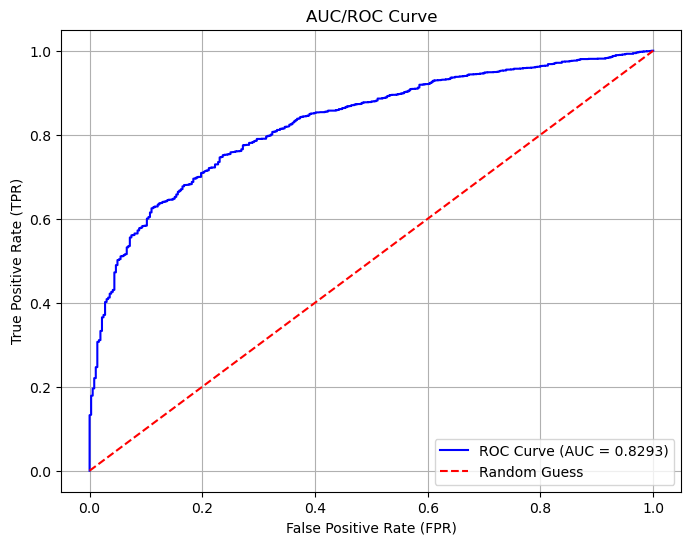

In [182]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TP, FP, FN, TN = conf_matrix[1, 1], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[0, 0]

# Metrics
accuracy = accuracy_score(y_test, y_test_pred)
TPR = TP / (TP + FN)  # True Positive Rate (Recall/Sensitivity)
FPR = FP / (FP + TN)  # False Positive Rate
precision = TP / (TP + FP)
f1 = f1_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_test_proba)

# Print metrics
print("Confusion Matrix (Test Data):")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {auc:.4f}")

# Plot AUC/ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC/ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [184]:
# For Model 2 (with RandomSearch cross-validation), Top 10 feature selection 
model_2_results_3 = {
    'Model': 'XG Boosting',  
    'Features Selected': 'Top 10 Features',  
    'Validation Technique': 'RandomSearch CV',  
    'Accuracy': accuracy,
    'TPR': TPR,
    'FPR': FPR,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': auc
}

# Create a DataFrame for the new row
new_row_6 = pd.DataFrame([model_2_results_3])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_6], ignore_index=True)

## XG Boosting Model with Features selected based on threshold value - No CV

In [191]:
# Set a threshold for feature importance
threshold = 0.02

# Filter features based on importance
important_features = feature_importance_sorted[feature_importance_sorted['Importance'] >= threshold]['Feature']
X_important = X[important_features]

Confusion Matrix:
[[ 261  103]
 [ 431 1483]]
Accuracy: 0.77
True Positive Rate (TPR): 0.77
False Positive Rate (FPR): 0.28
F1 Score: 0.85
Precision: 0.94


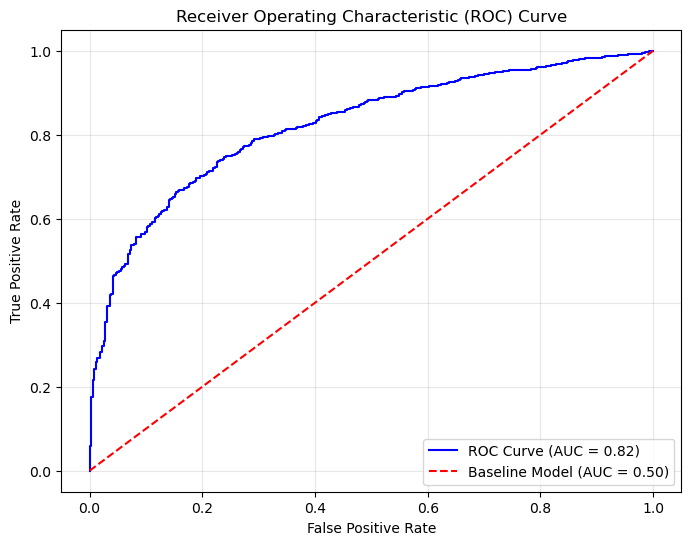

In [198]:
# Scale features
scaler = StandardScaler()
X_scaled_imp = scaler.fit_transform(X_important)

#Split data into training and testing
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_scaled_imp, y, test_size=0.2, random_state=42, stratify=y)

#Build the model 

from xgboost import XGBClassifier

# XGBoost with scale_pos_weight
xgb = XGBClassifier(scale_pos_weight=ratio_of_negative_to_positive_class, random_state=42)
xgb.fit(X_train_imp, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_imp)

#Evaluation Metrics

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)

# True Positive Rate (TPR) or Sensitivity
tpr_value = tp / (tp + fn)

# False Positive Rate (FPR)
fpr_value = fp / (fp + tn)

# Precision
precision = precision_score(y_test, y_pred_xgb)

#F1 score
f1 = f1_score(y_test, y_pred_xgb)

# Print the metrics
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"True Positive Rate (TPR): {tpr_value:.2f}")
print(f"False Positive Rate (FPR): {fpr_value:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_prob_test = xgb.predict_proba(X_test_imp)[:, 1]  # For probabilities

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', label='Baseline Model (AUC = 0.50)', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [200]:
# For Model 2 (with no cross-validation), feature selection based on threshold
model_2_results_4 = {
    'Model': 'XG Boosting',  
    'Features Selected': 'Thresholded Features',  
    'Validation Technique': 'No CV',  
    'Accuracy': accuracy,
    'TPR': tpr_value,
    'FPR': fpr_value,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': roc_auc
}

# Create a DataFrame for the new row
new_row_7 = pd.DataFrame([model_2_results_4])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_7], ignore_index=True)

## GridSearchCV for threshold features - XG Boosting

In [210]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [ratio_of_negative_to_positive_class],
}

# Create the XGBoost model
xgb = XGBClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,
)

grid_search.fit(X_train_imp, y_train)

# Display the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 0.19038159958180867, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.7964


In [212]:
# Train the final model with the best parameters
final_xgb_Grid_1 = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    scale_pos_weight=0.19038159958180867,
    subsample=0.8,
    random_state=42
)

final_xgb_Grid_1.fit(X_train_imp, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Confusion Matrix (Test Data):
[[ 225  139]
 [ 334 1580]]
Accuracy: 0.7924
True Positive Rate (TPR): 0.8255
False Positive Rate (FPR): 0.3819
Precision: 0.9191
F1 Score: 0.85
ROC-AUC: 0.8176


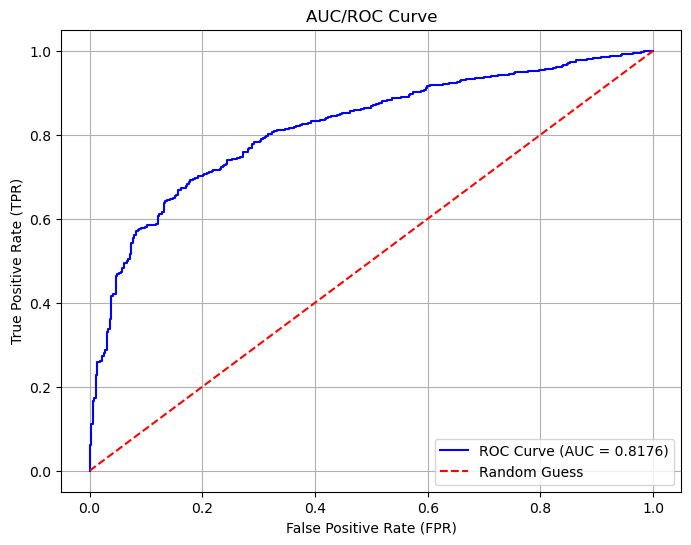

In [214]:
# Predict on test data
y_pred_test = final_xgb_Grid_1.predict(X_test_imp)
y_prob_test = final_xgb_Grid_1.predict_proba(X_test_imp)[:, 1]

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
TP, FP, FN, TN = conf_matrix[1, 1], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[0, 0]

# Metrics
accuracy = accuracy_score(y_test, y_pred_test)
TPR = TP / (TP + FN)  # True Positive Rate (Recall/Sensitivity)
FPR = FP / (FP + TN)  # False Positive Rate
precision = TP / (TP + FP)
f1 = f1_score(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_prob_test)

# Print metrics
print("Confusion Matrix (Test Data):")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {auc:.4f}")

# Plot AUC/ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC/ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [216]:
# For Model 2 (with GridSearch cross-validation), feature selection based on threshold
model_2_results_5 = {
    'Model': 'XG Boosting',  
    'Features Selected': 'Thresholded Features',  
    'Validation Technique': 'GridSearch CV',  
    'Accuracy': accuracy,
    'TPR': TPR,
    'FPR': FPR,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': auc
}

# Create a DataFrame for the new row
new_row_8 = pd.DataFrame([model_2_results_5])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_8], ignore_index=True)

## RandomSearchCV for features based on Threshold - XG Boosting

In [222]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [ratio_of_negative_to_positive_class]
}

# Initialize model
xgb = XGBClassifier(random_state=42, eval_metric="logloss")

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Test 50 random combinations
    scoring="roc_auc",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42,
)

# Fit
random_search.fit(X_train_imp, y_train)

# Best parameters
print("Best parameters found:", random_search.best_params_)
print("Best AUC score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'subsample': 0.8, 'scale_pos_weight': 0.19038159958180867, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best AUC score: 0.8410318172092701


In [224]:
best_model = random_search.best_estimator_
y_test_proba = best_model.predict_proba(X_test_imp)[:, 1]
y_test_pred = best_model.predict(X_test_imp)

Confusion Matrix (Test Data):
[[ 283   81]
 [ 498 1416]]
Accuracy: 0.7458
True Positive Rate (TPR): 0.7398
False Positive Rate (FPR): 0.2225
Precision: 0.9459
F1 Score: 0.83
ROC-AUC: 0.8331


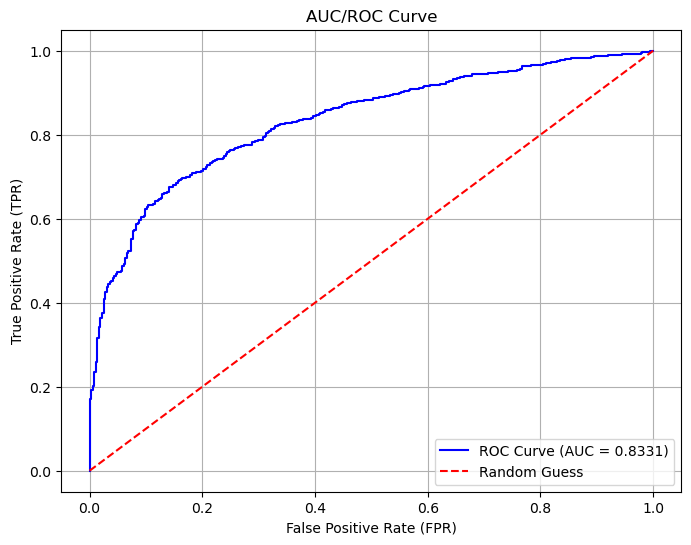

In [226]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TP, FP, FN, TN = conf_matrix[1, 1], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[0, 0]

# Metrics
accuracy = accuracy_score(y_test, y_test_pred)
TPR = TP / (TP + FN)  # True Positive Rate (Recall/Sensitivity)
FPR = FP / (FP + TN)  # False Positive Rate
precision = TP / (TP + FP)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_proba)

# Print metrics
print("Confusion Matrix (Test Data):")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {auc:.4f}")

# Plot AUC/ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC/ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [229]:
# For Model 2 (with RandomSearch cross-validation), feature selection based on threshold
model_2_results_6 = {
    'Model': 'XG Boosting',  
    'Features Selected': 'Thresholded Features',  
    'Validation Technique': 'RandomSearch CV',  
    'Accuracy': accuracy,
    'TPR': TPR,
    'FPR': FPR,
    'Precision': precision,
    'F1 Score':f1,
    'ROC-AUC': auc
}

# Create a DataFrame for the new row
new_row_9 = pd.DataFrame([model_2_results_6])

# Adding the row to the DataFrame
results_df = pd.concat([results_df, new_row_9], ignore_index=True)

In [231]:
results_df

,Model,Features Selected,Validation Technique,Accuracy,TPR,FPR,Precision,F1 Score,ROC-AUC
0,Gradient Boosting,All Features,No CV,0.847234,0.960293,0.747253,0.871090,0.913519,0.829107
1,Gradient Boosting,Top 10 Features,No CV,0.845917,0.95977,0.752747,0.870204,0.912795,0.830315
2,Gradient Boosting,Thresholded Features,No CV,0.842406,0.960293,0.777473,0.866572,0.911029,0.825321
3,XG Boosting,All Features,No CV,0.779631,0.796761,0.310440,0.931013,0.858671,0.826646
4,XG Boosting,Top 10 Features,No CV,0.735733,0.735632,0.263736,0.936170,0.823874,0.818381
5,XG Boosting,Top 10 Features,GridSearch CV,0.753731,0.777429,0.370879,0.916821,0.841391,0.803657
6,XG Boosting,Top 10 Features,RandomSearch CV,0.731782,0.722048,0.217033,0.945927,0.841391,0.829300
7,XG Boosting,Thresholded Features,No CV,0.765584,0.774817,0.282967,0.935057,0.847429,0.822554
8,XG Boosting,Thresholded Features,GridSearch CV,0.792362,0.825496,0.381868,0.919139,0.847429,0.817613
9,XG Boosting,Thresholded Features,RandomSearch CV,0.745830,0.739812,0.222527,0.945892,0.830255,0.833132
